# 第三章 平稳时间序列分析

In [106]:
import pandas as pd
import numpy as np
import datetime
import os

import matplotlib as  mpl
import matplotlib.pyplot as plt
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

from statsmodels.tsa.stattools import acf,pacf,adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA



习题数据="./习题与案例数据/习题数据/"
案例数据="./习题与案例数据/案例数据/"

In [47]:
# 使用Q_LB进行白噪音假设
def my_Q_LB(ts,out_lags_list=[10],p_threshold=0.05):
    from scipy.stats  import  chi2
    n=len(ts)
    acf_ts=acf(ts,nlags=n)

    list_df=[]
    for l in out_lags_list:
        q_lb=sum([n*(n+2)*acf_ts[k]**2/(n-k)  for k in range(1,l+1) ])
        p=1- chi2.cdf(q_lb,l)
        tmp_l=[l,q_lb,p,p>p_threshold]
        list_df.append(tmp_l)

    df=pd.DataFrame(list_df,columns=['延迟期数','Q_LB统计量','P值','接受白噪音假设'])
    return df
    

## 例题3-1

In [18]:
def create_timeseries(order=(1,0),num=20,p_list=[1],var=1):
    p_list=list(reversed(p_list))
    p_list+=[0 for i in range(order[0]-len(p_list))]
    normal_list=list(np.random.normal(size=num))

    ts=[normal_list[i] for i in range(order[0])]
    for i in range(order[0],num):
        ts.append(sum([m*n for m,n in  zip([ts[i-j-1] for j in range(order[0])], 
                                           reversed(p_list))])+normal_list[i])
    return ts

def adf_check_table(ts,max_lag,threshod=0.05):
    DICT_REGRESSION={'nc':'类型1',
                 'c':'类型2',
                 'ct':'类型3'}
    list_df=[]
    for i_reg in DICT_REGRESSION.keys():
        for i in range(max_lag+1):
            dftest=adfuller(ts,maxlag=i,regression=i_reg,autolag=None)
            dfoutput=pd.Series([DICT_REGRESSION[i_reg],i,'平稳' if dftest[1]<threshod else '非平稳']+list(dftest[0:4]),
                               index=['类型','延迟阶数','检验结果','Test Statistic','p-value','Lags Used',
            'Number of observations Used'])
            for key,value in dftest[4].items():
                dfoutput['Critical value(%s)'%key]=value
            list_df.append(dfoutput)
    return pd.concat(list_df,axis=1).transpose()

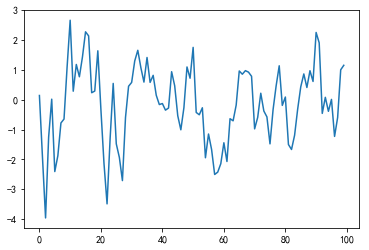

,类型,延迟阶数,检验结果,Test Statistic,p-value,Lags Used,Number of observations Used,Critical value(1%),Critical value(5%),Critical value(10%)
0,类型1,0,平稳,-4.604,6.0545e-06,0,99,-2.58869,-1.94402,-1.61439
1,类型2,0,平稳,-4.60991,0.000123845,0,99,-3.4982,-2.89121,-2.5826
2,类型3,0,平稳,-4.61943,0.000956436,0,99,-4.05325,-3.45581,-3.15359


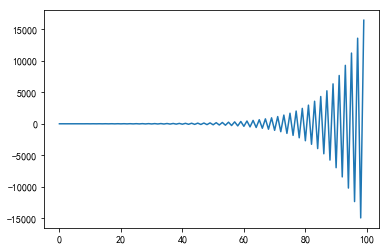

,类型,延迟阶数,检验结果,Test Statistic,p-value,Lags Used,Number of observations Used,Critical value(1%),Critical value(5%),Critical value(10%)
0,类型1,0,平稳,-78156.5,0,0,99,-2.58869,-1.94402,-1.61439
1,类型2,0,平稳,-77889.8,0,0,99,-3.4982,-2.89121,-2.5826
2,类型3,0,平稳,-77431.4,0,0,99,-4.05325,-3.45581,-3.15359


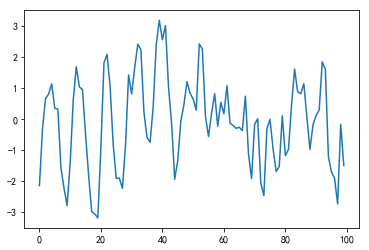

,类型,延迟阶数,检验结果,Test Statistic,p-value,Lags Used,Number of observations Used,Critical value(1%),Critical value(5%),Critical value(10%)
0,类型1,0,平稳,-4.47463,1.05158e-05,0,99,-2.58869,-1.94402,-1.61439
1,类型2,0,平稳,-4.45358,0.000238319,0,99,-3.4982,-2.89121,-2.5826
2,类型3,0,平稳,-4.44819,0.00183251,0,99,-4.05325,-3.45581,-3.15359


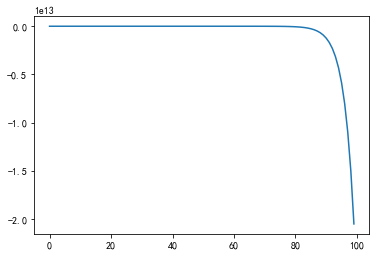

,类型,延迟阶数,检验结果,Test Statistic,p-value,Lags Used,Number of observations Used,Critical value(1%),Critical value(5%),Critical value(10%)
0,类型1,0,非平稳,8.15592e+12,1,0,99,-2.58869,-1.94402,-1.61439
1,类型2,0,非平稳,7.97249e+12,1,0,99,-3.4982,-2.89121,-2.5826
2,类型3,0,非平稳,7.18067e+12,1,0,99,-4.05325,-3.45581,-3.15359


In [31]:
ts1=create_timeseries(order=(1,0),num=100,p_list=[0.8])
plt.plot(ts1)
plt.show()
display(adf_check_table(ts1,max_lag=0))

ts2=create_timeseries(order=(1,0),num=100,p_list=[-1.1])
plt.plot(ts2)
plt.show()
display(adf_check_table(ts2,max_lag=0))


ts3=create_timeseries(order=(2,0),num=100,p_list=[1,-0.5])
plt.plot(ts3)
plt.show()
display(adf_check_table(ts3,max_lag=0))

ts4=create_timeseries(order=(2,0),num=100,p_list=[1,0.5])
plt.plot(ts4)
plt.show()
display(adf_check_table(ts4,max_lag=0))

## 3-5 自相关图
- AR pacf 明显截尾性

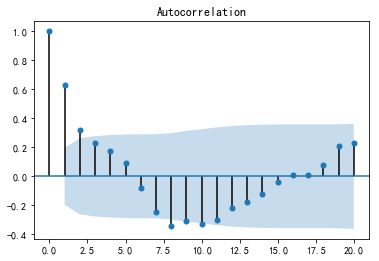

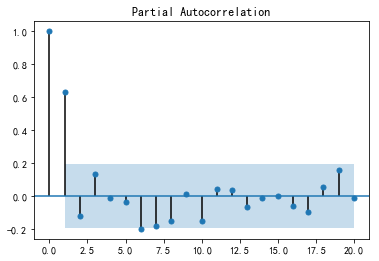

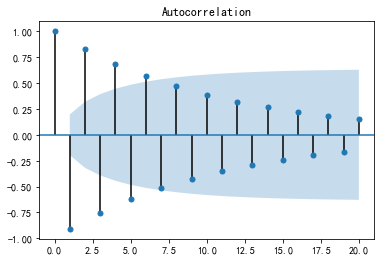

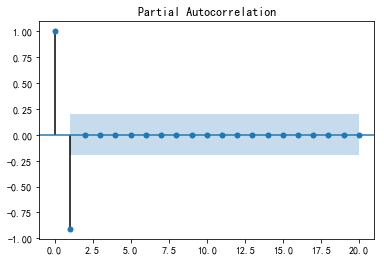

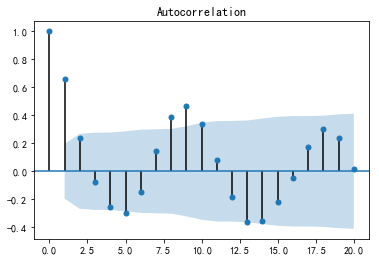

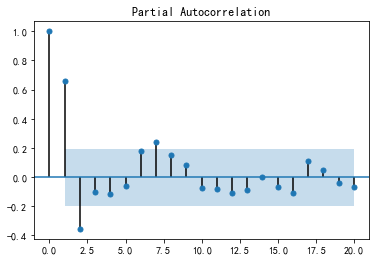

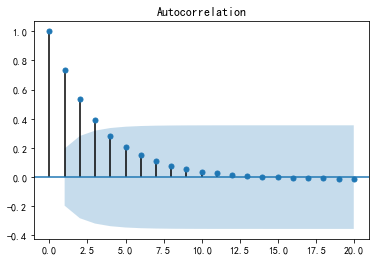

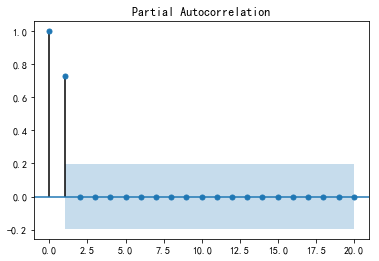

In [32]:
sm.graphics.tsa.plot_acf(ts1,lags=20)
sm.graphics.tsa.plot_pacf(ts1,lags=20)
plt.show()
sm.graphics.tsa.plot_acf(ts2,lags=20)
sm.graphics.tsa.plot_pacf(ts2,lags=20)
plt.show()
sm.graphics.tsa.plot_acf(ts3,lags=20)
sm.graphics.tsa.plot_pacf(ts3,lags=20)
plt.show()
sm.graphics.tsa.plot_acf(ts4,lags=20)
sm.graphics.tsa.plot_pacf(ts4,lags=20)
plt.show()

# 3-9 新增里程数

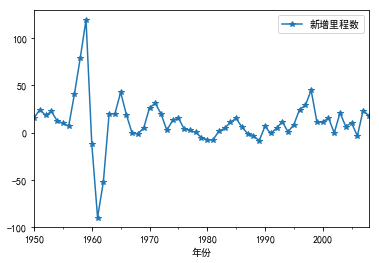

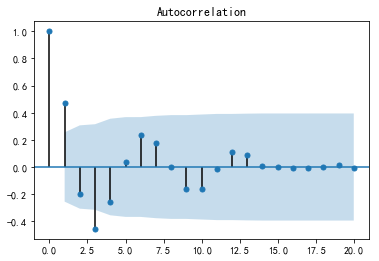

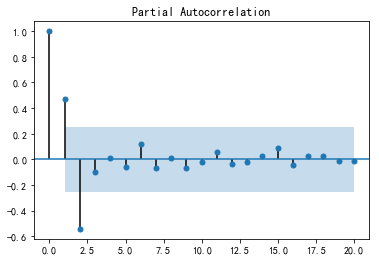

In [41]:
新增里程数=pd.read_excel(os.path.join(案例数据,"附录1.8.xlsx"))
新增里程数['年份']=pd.to_datetime(新增里程数['年份'],format='%Y')
新增里程数.set_index('年份',inplace=True)
新增里程数.plot(marker='*')
plt.show()
sm.graphics.tsa.plot_acf(新增里程数,lags=20)
sm.graphics.tsa.plot_pacf(新增里程数,lags=20)
plt.show()


- 明显偏相关系数二阶断尾-->说明是AR(2)

# 3-10 加油站

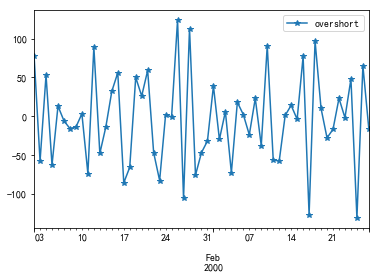

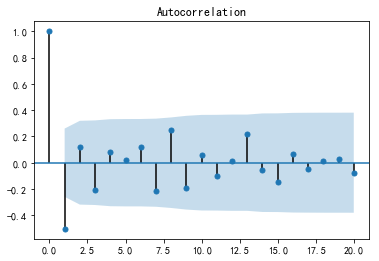

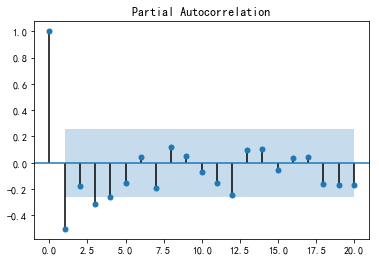

In [70]:
加油站=pd.read_excel(os.path.join(案例数据,"附录1.9.xlsx"))
加油站.set_index('day',inplace=True)
加油站.index=[datetime.datetime(2000,1,1)+datetime.timedelta(days=int(i)) for i in 加油站.index]
加油站.plot(marker='*')
plt.show()
sm.graphics.tsa.plot_acf(加油站,lags=20)
sm.graphics.tsa.plot_pacf(加油站,lags=20)
plt.show()


- 明显自相关系数一阶断尾-->说明是MA(1)

# 3-11  气温

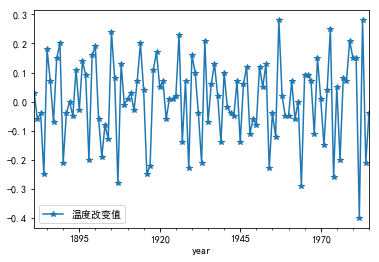

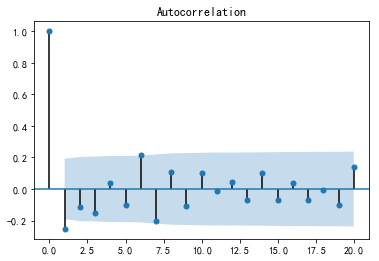

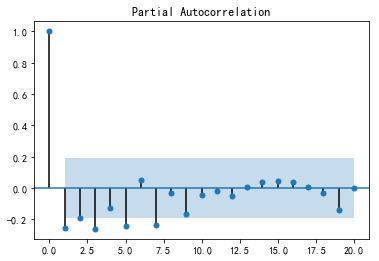

In [74]:
全球气温=pd.read_excel(os.path.join(案例数据,"附录1.10.xlsx"))
全球气温['year']=pd.to_datetime(全球气温['year'],format='%Y')
全球气温.set_index('year',inplace=True)
全球气温差分=全球气温.diff().dropna()
全球气温差分.plot(marker='*')
plt.show()
sm.graphics.tsa.plot_acf(全球气温差分,lags=20)
sm.graphics.tsa.plot_pacf(全球气温差分,lags=20)
plt.show()


- 一阶差分后，自相关一阶断尾 MA(1) AR(1)

# 模型校验 
- 模型的显著性校验  检验残差序列是不是白噪声
- 参数显著性校验

In [109]:
model=SARIMAX(endog=新增里程数,order=(2,0,0),trend='c')
results=model.fit()
print(results.params)
my_Q_LB(results.resid,out_lags_list=[6,12,18])

intercept      8.937662
ar.L1          0.718548
ar.L2         -0.529421
sigma2       365.144271
dtype: float64


,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,2.357716,0.884039,True
1,12,3.377321,0.992243,True
2,18,4.170272,0.999679,True


In [71]:
model=SARIMAX(endog=加油站,order=(0,0,1),trend='c')
results=model.fit()
print(results.params)
my_Q_LB(results.resid,out_lags_list=[6,12,18])

intercept      -4.794494
ma.L1          -0.847660
sigma2       2019.766412
dtype: float64


,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,3.269349,0.774360,True
1,12,10.070329,0.609791,True
2,18,21.183280,0.270267,True



#### 注意
- 如果有MA的项目时，enforce_invertibility 应设置为False

In [76]:
model=SARIMAX(endog=全球气温差分,order=(1,0,1),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.params)
my_Q_LB(results.resid,out_lags_list=[6,12,18])

intercept    0.003235
ar.L1        0.392831
ma.L1       -0.886840
sigma2       0.015409
dtype: float64


,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,5.043916,0.538193,True
1,12,10.230762,0.595724,True
2,18,13.533805,0.758937,True


# 模型优化

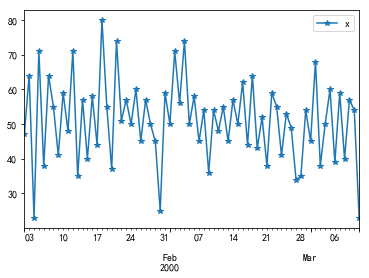

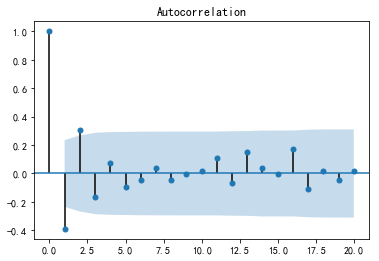

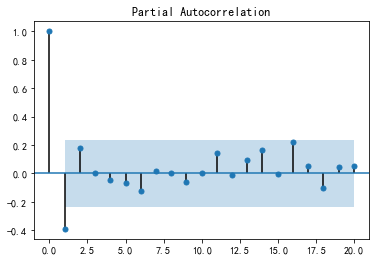

,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,21.318620,0.001608,False
1,12,23.034683,0.027433,False
2,18,29.102660,0.047139,False



para
 intercept     51.169603
ma.L1         -0.319431
ma.L2          0.301882
sigma2       114.434513
dtype: float64

t value
 intercept    37.860520
ma.L1        -2.565232
ma.L2         2.409730
sigma2        6.335320
dtype: float64

t aic 538.705545459

t aic 547.699526427


,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,6,2.321859,0.887848,True
1,12,4.480456,0.973127,True
2,18,10.767591,0.903957,True


In [96]:
化学反应=pd.read_excel(os.path.join(案例数据,"附录1.11.xlsx"))
化学反应.set_index('time',inplace=True)
化学反应.index=[datetime.datetime(2000,1,1)+datetime.timedelta(days=int(i)) for i in 化学反应.index]
化学反应.plot(marker='*')
plt.show()
sm.graphics.tsa.plot_acf(化学反应,lags=20)
sm.graphics.tsa.plot_pacf(化学反应,lags=20)
plt.show()
display(my_Q_LB(化学反应,out_lags_list=[6,12,18]))

model=SARIMAX(endog=化学反应,order=(0,0,2),trend='c',enforce_invertibility=False)
results=model.fit()
print('\npara\n',results.params)
print('\nt value\n',results.tvalues)
print('\nt aic',results.aic)
print('\nt aic',results.bic)
my_Q_LB(results.resid,out_lags_list=[6,12,18])

# 序列预测
- 仅限于ARIMA 

In [139]:
# 仅限于ARIMA
def confidence_interval(results,steps=5,alpha=0.05):
    val,_,intv=results.forecast(steps=steps,alpha=alpha)
    return pd.DataFrame(np.concatenate([val.reshape(-1,1),intv],axis=1),columns=['预测值','{:,.0%}置信区间下限'.format(alpha),'{:,.0%}置信区间上限'.format(alpha)])
    

In [141]:
model=ARIMA(endog=新增里程数,order=(2,0,0))
results=model.fit()
print(results.params)
my_Q_LB(results.resid,out_lags_list=[6,12,18])
# results.forecast(steps=5,alpha=0.05)
confidence_interval(results)

const          11.022131
ar.L1.新增里程数     0.718546
ar.L2.新增里程数    -0.529423
dtype: float64


,预测值,5%置信区间下限,5%置信区间上限
0,9.464946,-27.987508,46.917400
1,6.216016,-39.902373,52.334404
2,8.393125,-37.727879,54.514128
3,11.677538,-36.699306,60.054383
4,12.884929,-36.561943,62.331802
